-----------------------------------------------
# <font color='red'>Solar Radiation Prediction</font>
### The Data used here can be found through  <a href="https://www.kaggle.com/dronio/SolarEnergy#" target="_blank">`This Link`</a> on Kaggle Website.
-----------------------------------------------
-----------------------------------------------

## <font color='green'>Description of This File</font> 

### The dataset contains such columns as: `wind direction`, `wind speed`, `humidity` and `temperature`. 

### The response parameter that is to be predicted is: `Solar_radiation`. 
#### It contains measurements for the past 4 months and you have to `predict the level of solar radiation`.

## `Just imagine that you've got solar energy batteries and you want to know will it be reasonable to use them in future?`



#### The best result of accuracy I could get using cross-validation was only 55%.
------------------
------------------

##  <font color='green'>About This File</font>


#### These datasets are meteorological data from the `HI-SEAS weather station` from `four months` (September through December 2016) between Mission IV and Mission V.

### For each dataset, the fields are:

- A row number (1-n) useful in sorting this export's results
- The `UNIX time_t` date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results
- The date in yyyy-mm-dd format
- The local time of day in hh:mm:ss 24-hour format
- The numeric data, if any (may be an empty string)
- The text data, if any (may be an empty string)

### <font color='red'>The units of each dataset are</font>:

- `Solar radiation`: watts per meter^2

- `Temperature`: degrees Fahrenheit

- `Humidity`: percent

- `Barometric pressure`: Hg

- `Wind direction`: degrees

- `Wind speed`: miles per hour

- `Sunrise/sunset`: Hawaii time

## - `'Solar radiation'`: The target variable. 

_______________________________________
## `What is a Unix Timestamp`?

- Simply put, `the Unix timestamp` is a way to track time as a running total of seconds. This count starts at `the Unix Epoch` on `January 1st, 1970` at UTC. 

- Therefore, the `Unix timestamp` is merely the number of seconds between a particular date and the Unix Epoch. 

- It should also be pointed out that this point in time technically does not change no matter where you are located on the globe. 

- This is very useful to computer systems for tracking and sorting dated information in dynamic and distributed applications both online and client side. 

- The reason why Unix timestamps are used by many webmasters is because `they can represent all time zones at once`. 

# 1. Import the required Libraries

In [2]:
pip install datasist

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datasist as ds
import warnings
from pytz import timezone
import pytz
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [20, 12]}, font_scale=1.2)

# 2. Load Data

In [4]:
df= pd.read_csv('SolarPrediction.csv')
df=df.sort_values(['UNIXTime'], ascending = [True])
df

UNIXTime                    Data  ... TimeSunRise  TimeSunSet
7416   1472724008    9/1/2016 12:00:00 AM  ...    06:07:00    18:38:00
7415   1472724310    9/1/2016 12:00:00 AM  ...    06:07:00    18:38:00
7414   1472725206    9/1/2016 12:00:00 AM  ...    06:07:00    18:38:00
7413   1472725505    9/1/2016 12:00:00 AM  ...    06:07:00    18:38:00
7412   1472725809    9/1/2016 12:00:00 AM  ...    06:07:00    18:38:00
...           ...                     ...  ...         ...         ...
24526  1483263302  12/31/2016 12:00:00 AM  ...    06:57:00    17:54:00
24525  1483263601  12/31/2016 12:00:00 AM  ...    06:57:00    17:54:00
24524  1483263904  12/31/2016 12:00:00 AM  ...    06:57:00    17:54:00
24523  1483264203  12/31/2016 12:00:00 AM  ...    06:57:00    17:54:00
24522  1483264501  12/31/2016 12:00:00 AM  ...    06:57:00    17:54:00

[32686 rows x 11 columns]

In [5]:
df.reset_index(inplace = True, drop = True) 
df

UNIXTime                    Data  ... TimeSunRise  TimeSunSet
0      1472724008    9/1/2016 12:00:00 AM  ...    06:07:00    18:38:00
1      1472724310    9/1/2016 12:00:00 AM  ...    06:07:00    18:38:00
2      1472725206    9/1/2016 12:00:00 AM  ...    06:07:00    18:38:00
3      1472725505    9/1/2016 12:00:00 AM  ...    06:07:00    18:38:00
4      1472725809    9/1/2016 12:00:00 AM  ...    06:07:00    18:38:00
...           ...                     ...  ...         ...         ...
32681  1483263302  12/31/2016 12:00:00 AM  ...    06:57:00    17:54:00
32682  1483263601  12/31/2016 12:00:00 AM  ...    06:57:00    17:54:00
32683  1483263904  12/31/2016 12:00:00 AM  ...    06:57:00    17:54:00
32684  1483264203  12/31/2016 12:00:00 AM  ...    06:57:00    17:54:00
32685  1483264501  12/31/2016 12:00:00 AM  ...    06:57:00    17:54:00

[32686 rows x 11 columns]

In [6]:
# Visualize the data dtype and missing data from columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [7]:
# See the value counts of all columns to see if coulmns have a non_valid values..
for col in df.columns:
    print(col+ '\n------------')
    print(df[col].value_counts())
    print('------------'*2)

UNIXTime
------------
1474408504    1
1473058504    1
1482284721    1
1477168819    1
1475018421    1
             ..
1478884202    1
1473235820    1
1482776139    1
1473696623    1
1473839104    1
Name: UNIXTime, Length: 32686, dtype: int64
------------------------
Data
------------
11/6/2016 12:00:00 AM     288
11/28/2016 12:00:00 AM    288
12/9/2016 12:00:00 AM     288
10/20/2016 12:00:00 AM    288
10/28/2016 12:00:00 AM    288
                         ... 
9/16/2016 12:00:00 AM     185
12/8/2016 12:00:00 AM     154
9/8/2016 12:00:00 AM      142
9/15/2016 12:00:00 AM     140
9/9/2016 12:00:00 AM      123
Name: Data, Length: 118, dtype: int64
------------------------
Time
------------
16:20:18    24
18:45:18    21
15:45:18    21
20:05:18    21
19:20:18    21
            ..
04:25:25     1
05:45:08     1
11:35:54     1
08:46:02     1
12:15:10     1
Name: Time, Length: 8299, dtype: int64
------------------------
Radiation
------------
1.22      2264
1.23      2110
1.21      2010
1.24   

In [8]:
# Describe the data to intially determine the outliers..
df.describe()

UNIXTime     Radiation  ...  WindDirection(Degrees)         Speed
count  3.268600e+04  32686.000000  ...            32686.000000  32686.000000
mean   1.478047e+09    207.124697  ...              143.489821      6.243869
std    3.005037e+06    315.916387  ...               83.167500      3.490474
min    1.472724e+09      1.110000  ...                0.090000      0.000000
25%    1.475546e+09      1.230000  ...               82.227500      3.370000
50%    1.478026e+09      2.660000  ...              147.700000      5.620000
75%    1.480480e+09    354.235000  ...              179.310000      7.870000
max    1.483265e+09   1601.260000  ...              359.950000     40.500000

[8 rows x 7 columns]

## `Working With UNIXTime`

In [9]:
hawaii= timezone('Pacific/Honolulu')
utc_time = pytz.utc

#We use df.index because z_localize/tz_convert act on the INDEX of the object, not on the values. 
#Easiest to simply turn it into an index then localize and convert.
df.index =  pd.to_datetime(df['UNIXTime'], unit='s')
df.index = df.index.tz_localize(utc_time).tz_convert(hawaii)


#Create New Column from The Index 
df['New_UNIXTime'] = df.index 


#Reset The Index
df.reset_index(inplace = True, drop = True) 


#Reordered The Columns for good Visualization
df=df[['UNIXTime','New_UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet']]


#Show Sample of the Data
df.sample(50)


UNIXTime              New_UNIXTime  ... TimeSunRise TimeSunSet
8847   1475754921 2016-10-06 01:55:21-10:00  ...    06:15:00   18:07:00
20460  1479262502 2016-11-15 16:15:02-10:00  ...    06:31:00   17:43:00
12147  1476764420 2016-10-17 18:20:20-10:00  ...    06:18:00   17:58:00
21220  1479490818 2016-11-18 07:40:18-10:00  ...    06:33:00   17:43:00
16592  1478101217 2016-11-02 05:40:17-10:00  ...    06:24:00   17:48:00
7081   1475127924 2016-09-28 19:45:24-10:00  ...    06:13:00   18:14:00
13692  1477228518 2016-10-23 03:15:18-10:00  ...    06:20:00   17:54:00
2271   1473574520 2016-09-10 20:15:20-10:00  ...    06:09:00   18:30:00
17097  1478253018 2016-11-03 23:50:18-10:00  ...    06:25:00   17:47:00
2638   1473686723 2016-09-12 03:25:23-10:00  ...    06:09:00   18:28:00
9274   1475884223 2016-10-07 13:50:23-10:00  ...    06:15:00   18:06:00
22451  1479860403 2016-11-22 14:20:03-10:00  ...    06:35:00   17:42:00
11269  1476495017 2016-10-14 15:30:17-10:00  ...    06:17:00   18:00:00
22311  1479818402 2016-11-22 02:40:02-10:00  ...    06:35:00   17:42:00
23207  1480087803 2016-11-25 05:30:03-10:00  ...    06:37:00   17:42:00
6473   1474941019 2016-09-26 15:50:19-10:00  ...    06:12:00   18:15:00
10721  1476327320 2016-10-12 16:55:20-10:00  ...    06:16:00   18:02:00
25305  1480821334 2016-12-03 17:15:34-10:00  ...    06:42:00   17:43:00
24855  1480686302 2016-12-02 03:45:02-10:00  ...    06:42:00   17:42:00
25504  1480881034 2016-12-04 09:50:34-10:00  ...    06:43:00   17:43:00
9347   1475906120 2016-10-07 19:55:20-10:00  ...    06:15:00   18:06:00
15133  1477662318 2016-10-28 03:45:18-10:00  ...    06:22:00   17:51:00
32106  1483089902 2016-12-29 23:25:02-10:00  ...    06:56:00   17:53:00
3496   1473949806 2016-09-15 04:30:06-10:00  ...    06:10:00   18:26:00
24793  1480667704 2016-12-01 22:35:04-10:00  ...    06:41:00   17:42:00
19585  1479000001 2016-11-12 15:20:01-10:00  ...    06:30:00   17:44:00
16863  1478182820 2016-11-03 04:20:20-10:00  ...    06:25:00   17:47:00
32074  1483080302 2016-12-29 20:45:02-10:00  ...    06:56:00   17:53:00
940    1473023108 2016-09-04 11:05:08-10:00  ...    06:08:00   18:35:00
3802   1474117208 2016-09-17 03:00:08-10:00  ...    06:10:00   18:24:00
27298  1481644202 2016-12-13 05:50:02-10:00  ...    06:48:00   17:45:00
22224  1479792302 2016-11-21 19:25:02-10:00  ...    06:35:00   17:42:00
21580  1479598823 2016-11-19 13:40:23-10:00  ...    06:34:00   17:42:00
21106  1479456619 2016-11-17 22:10:19-10:00  ...    06:32:00   17:43:00
22874  1479987601 2016-11-24 01:40:01-10:00  ...    06:37:00   17:42:00
13035  1477030817 2016-10-20 20:20:17-10:00  ...    06:19:00   17:56:00
9081   1475825120 2016-10-06 21:25:20-10:00  ...    06:15:00   18:07:00
16508  1478075718 2016-11-01 22:35:18-10:00  ...    06:24:00   17:48:00
6001   1474791318 2016-09-24 22:15:18-10:00  ...    06:12:00   18:17:00
27458  1481692201 2016-12-13 19:10:01-10:00  ...    06:48:00   17:45:00
3361   1473908106 2016-09-14 16:55:06-10:00  ...    06:10:00   18:26:00
8760   1475727320 2016-10-05 18:15:20-10:00  ...    06:14:00   18:08:00
673    1472941204 2016-09-03 12:20:04-10:00  ...    06:08:00   18:36:00
21140  1479466821 2016-11-18 01:00:21-10:00  ...    06:33:00   17:43:00
26056  1481271349 2016-12-08 22:15:49-10:00  ...    06:45:00   17:44:00
18943  1478807401 2016-11-10 09:50:01-10:00  ...    06:28:00   17:45:00
24659  1480627502 2016-12-01 11:25:02-10:00  ...    06:41:00   17:42:00
13125  1477057818 2016-10-21 03:50:18-10:00  ...    06:19:00   17:55:00
29034  1482167422 2016-12-19 07:10:22-10:00  ...    06:52:00   17:48:00
29457  1482294621 2016-12-20 18:30:21-10:00  ...    06:52:00   17:48:00

[50 rows x 12 columns]

## `Extract Data from Time Columns`

In [10]:

df['Year']=df['New_UNIXTime'].dt.year
df['Month']=df['New_UNIXTime'].dt.month
df['Day']=df['New_UNIXTime'].dt.day
df['DayOfYear'] = df['New_UNIXTime'].dt.dayofyear
df['Time'] =  pd.to_datetime(df['Time'], format='%H:%M:%S')
df[['Hour(h)','Minute(m)','Second(s)']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in df['Time']])
df['TimeOfDay_s'] = df['Hour(h)']*60*60 + df['Minute(m)']*60 + df['Second(s)']

#####################################################################################################################
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S')
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S')
df['DayLength_s'] = df['TimeSunSet'].dt.hour*60*60 \
                           + df['TimeSunSet'].dt.minute*60 \
                           + df['TimeSunSet'].dt.second \
                           - df['TimeSunRise'].dt.hour*60*60 \
                           - df['TimeSunRise'].dt.minute*60 \
                           - df['TimeSunRise'].dt.second

#####################################################################################################################
df.drop(['UNIXTime','New_UNIXTime','Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)

df.sample(50)

Radiation  Temperature  Pressure  ...  Second(s)  TimeOfDay_s  DayLength_s
26836     237.10           54     30.36  ...         33        55233        39420
2063      857.65           56     30.40  ...         20        41120        44520
1058        1.89           50     30.47  ...          9        76509        44820
5867     1171.12           62     30.48  ...         22        39922        43500
20861       1.23           51     30.41  ...          2         6302        40260
15743      10.31           48     30.43  ...         19        24019        41160
26849     101.38           53     30.36  ...         34        59134        39420
24156     884.37           61     30.44  ...         22        45622        39780
1206      872.42           59     30.45  ...          3        36003        44820
12425      38.98           56     30.41  ...         18        63018        41940
13632       1.21           46     30.43  ...         17        79817        41640
32060       1.20           45     30.31  ...          5        70505        39420
27972     173.39           48     30.21  ...          5        51905        39360
31701     472.19           51     30.36  ...         49        48949        39360
13251     139.91           54     30.40  ...         17        51617        41760
10497       1.25           51     30.48  ...         21        78921        42420
2033        1.50           44     30.36  ...         22        12922        44520
10512       1.24           51     30.47  ...         23        83423        42420
26211     107.32           56     30.41  ...         50        40250        39480
28169       4.77           36     30.23  ...         18        24618        39360
19692       1.20           47     30.47  ...          1          901        40440
29547       1.21           46     30.45  ...         17         7217        39360
3932      622.34           59     30.46  ...         10        50410        44040
1380        2.87           47     30.40  ...         20         3620        44760
10793       1.28           52     30.49  ...         27        82527        42360
30392       1.21           48     30.48  ...         49         1849        39360
7817      553.52           57     30.47  ...         19        36019        42960
14488       1.20           47     30.46  ...         17        78617        41460
16635     665.95           63     30.48  ...         20        33320        41040
8447       31.58           54     30.42  ...         22        56422        42840
26295       1.24           51     30.39  ...         40        65440        39480
33          2.03           51     30.40  ...          6        11406        45060
24748       1.22           45     30.40  ...          4        67804        39660
6213      478.52           59     30.44  ...         22        58522        43440
8535        1.23           50     30.47  ...         20        82820        42840
23885     757.49           55     30.43  ...         18        50718        39840
22991     790.55           52     30.48  ...          6        41106        39900
12222       1.18           51     30.44  ...         18         2118        41940
23088       1.23           45     30.49  ...          1        70201        39900
13594       1.22           47     30.41  ...         20        68420        41640
15967       1.24           47     30.48  ...         17         5117        41160
8760        1.68           54     30.46  ...         20        65720        42840
10737       1.26           56     30.45  ...         21        65721        42360
14720      79.87           54     30.39  ...         19        62119        41460
3777        1.27           54     30.47  ...          5         3305        44040
24452     534.59           48     30.40  ...          3        48003        39720
10098    1028.58           63     30.42  ...         22        44122        42420
5731        1.22           53     30.48  ...         20        84620   

In [11]:
df.columns

Index(['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'Year', 'Month', 'Day', 'DayOfYear',
       'Hour(h)', 'Minute(m)', 'Second(s)', 'TimeOfDay_s', 'DayLength_s'],
      dtype='object')

In [12]:
df["WindDirection_D"]=df["WindDirection(Degrees)"]

In [13]:
df=df[['Year', 'Month', 'Day','DayOfYear','TimeOfDay_s', 'DayLength_s','Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection_D', 'Speed',  'Hour(h)','Minute(m)', 'Second(s)']]
df

Year  Month  Day  DayOfYear  ...  Speed  Hour(h)  Minute(m)  Second(s)
0      2016      9    1        245  ...  11.25        0          0          8
1      2016      9    1        245  ...   9.00        0          5         10
2      2016      9    1        245  ...   7.87        0         20          6
3      2016      9    1        245  ...  18.00        0         25          5
4      2016      9    1        245  ...  11.25        0         30          9
...     ...    ...  ...        ...  ...    ...      ...        ...        ...
32681  2016     12   31        366  ...   6.75       23         35          2
32682  2016     12   31        366  ...   5.62       23         40          1
32683  2016     12   31        366  ...   7.87       23         45          4
32684  2016     12   31        366  ...   7.87       23         50          3
32685  2016     12   31        366  ...   9.00       23         55          1

[32686 rows x 15 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             32686 non-null  int64  
 1   Month            32686 non-null  int64  
 2   Day              32686 non-null  int64  
 3   DayOfYear        32686 non-null  int64  
 4   TimeOfDay_s      32686 non-null  int64  
 5   DayLength_s      32686 non-null  int64  
 6   Radiation        32686 non-null  float64
 7   Temperature      32686 non-null  int64  
 8   Pressure         32686 non-null  float64
 9   Humidity         32686 non-null  int64  
 10  WindDirection_D  32686 non-null  float64
 11  Speed            32686 non-null  float64
 12  Hour(h)          32686 non-null  int64  
 13  Minute(m)        32686 non-null  int64  
 14  Second(s)        32686 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 3.7 MB


# 3- Data analysis & Visualization

### First Check the dtyps :

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             32686 non-null  int64  
 1   Month            32686 non-null  int64  
 2   Day              32686 non-null  int64  
 3   DayOfYear        32686 non-null  int64  
 4   TimeOfDay_s      32686 non-null  int64  
 5   DayLength_s      32686 non-null  int64  
 6   Radiation        32686 non-null  float64
 7   Temperature      32686 non-null  int64  
 8   Pressure         32686 non-null  float64
 9   Humidity         32686 non-null  int64  
 10  WindDirection_D  32686 non-null  float64
 11  Speed            32686 non-null  float64
 12  Hour(h)          32686 non-null  int64  
 13  Minute(m)        32686 non-null  int64  
 14  Second(s)        32686 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 3.7 MB


In [16]:
df.columns

Index(['Year', 'Month', 'Day', 'DayOfYear', 'TimeOfDay_s', 'DayLength_s',
       'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection_D',
       'Speed', 'Hour(h)', 'Minute(m)', 'Second(s)'],
      dtype='object')

### All Columns Dtype are appropriate 

### Then visualize the data

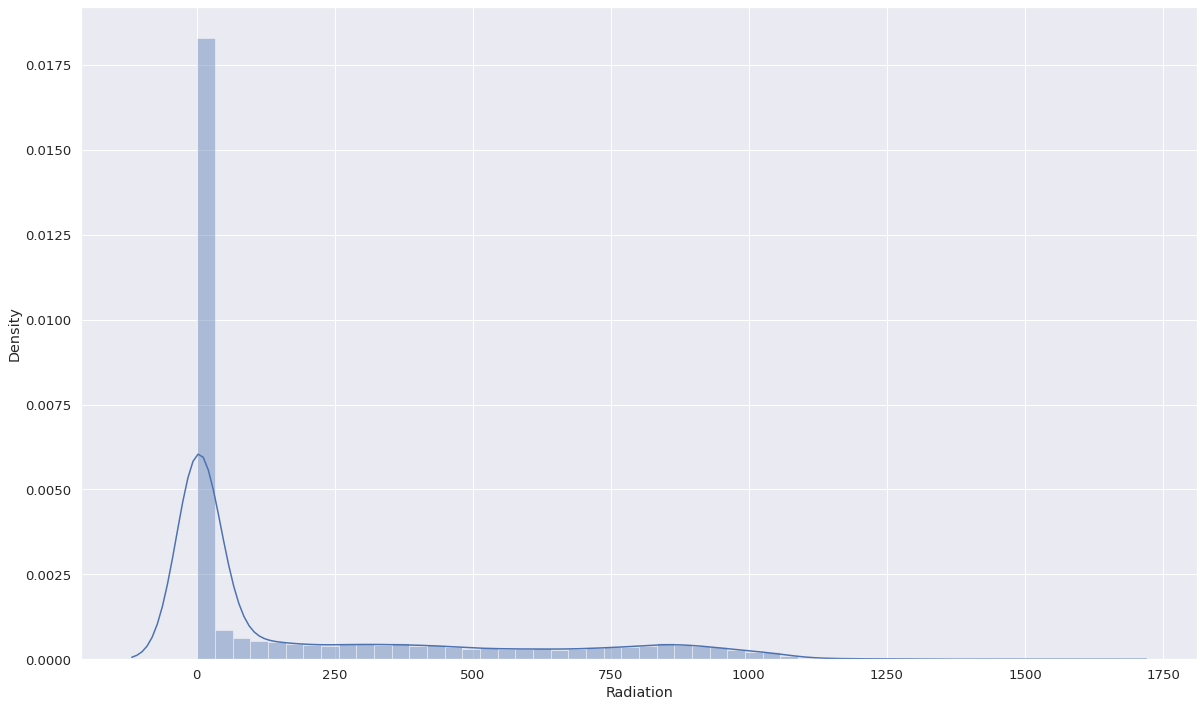

In [17]:
sns.distplot(df['Radiation'])

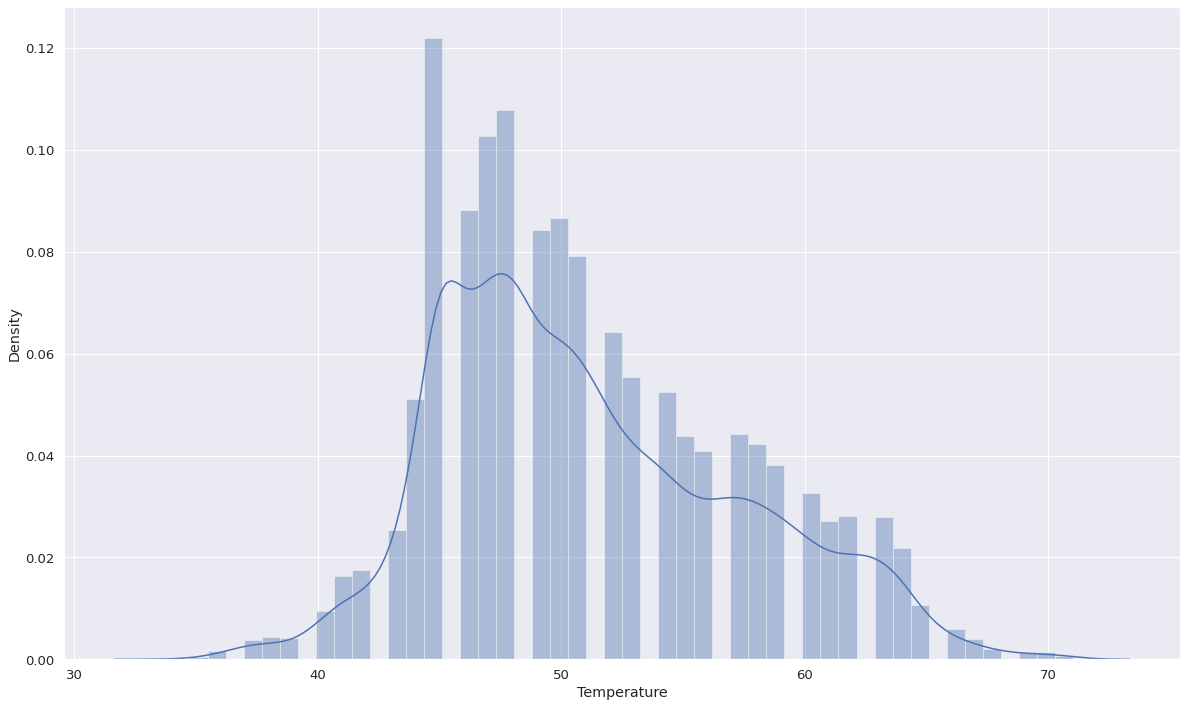

In [18]:
sns.distplot(df['Temperature'])

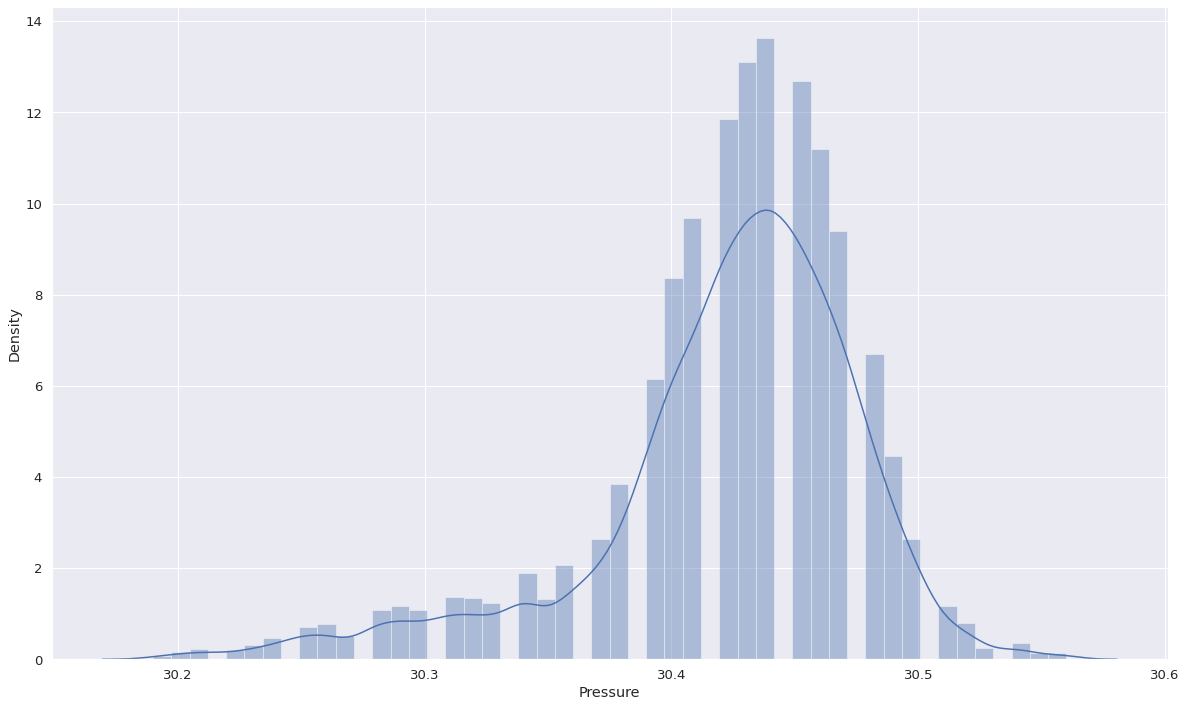

In [19]:
sns.distplot(df['Pressure'])

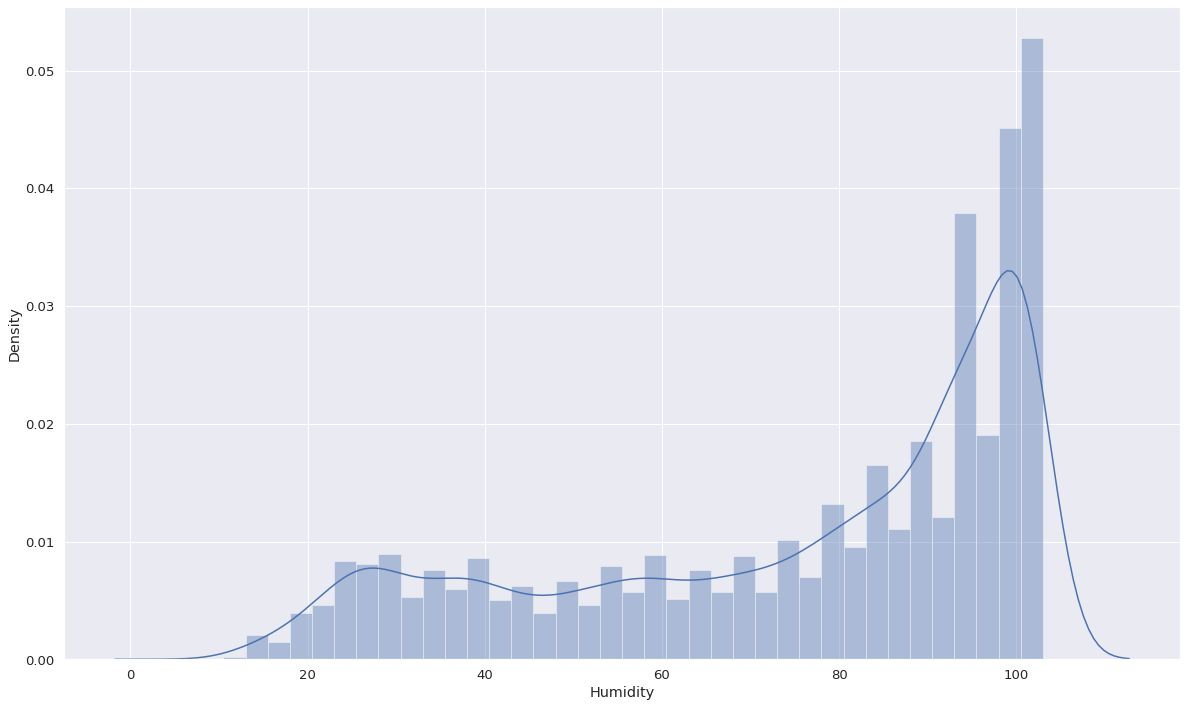

In [20]:
sns.distplot(df['Humidity'])

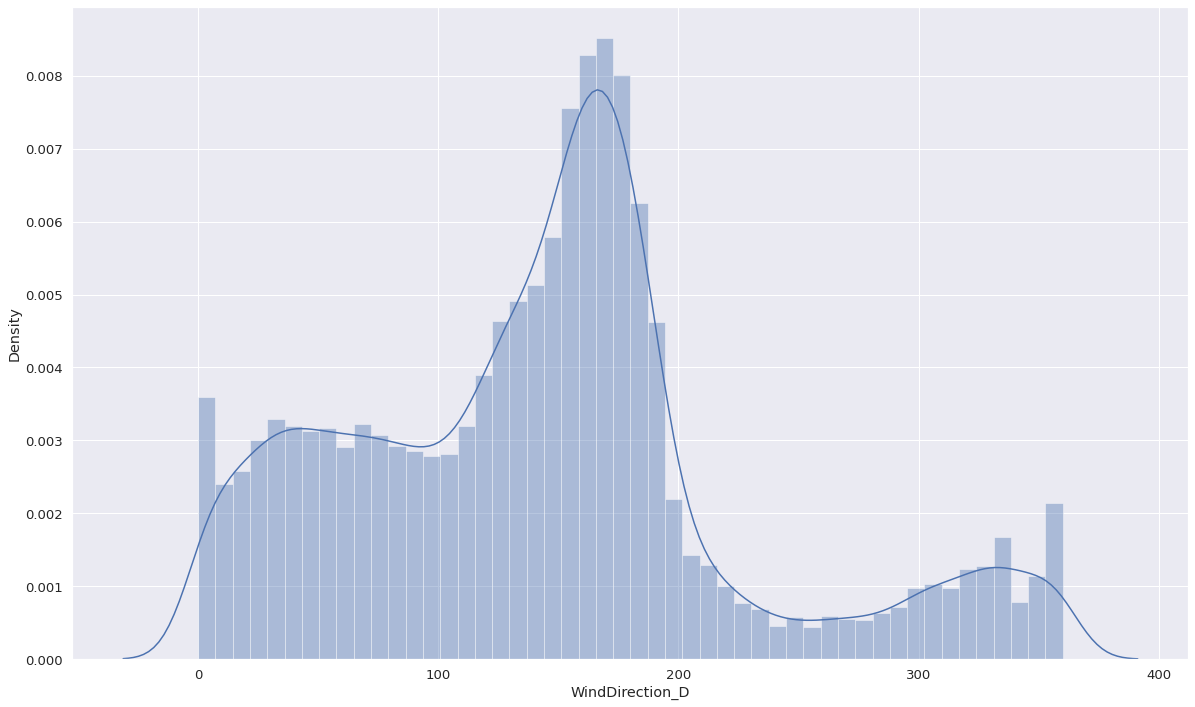

In [21]:
sns.distplot(df['WindDirection_D'])

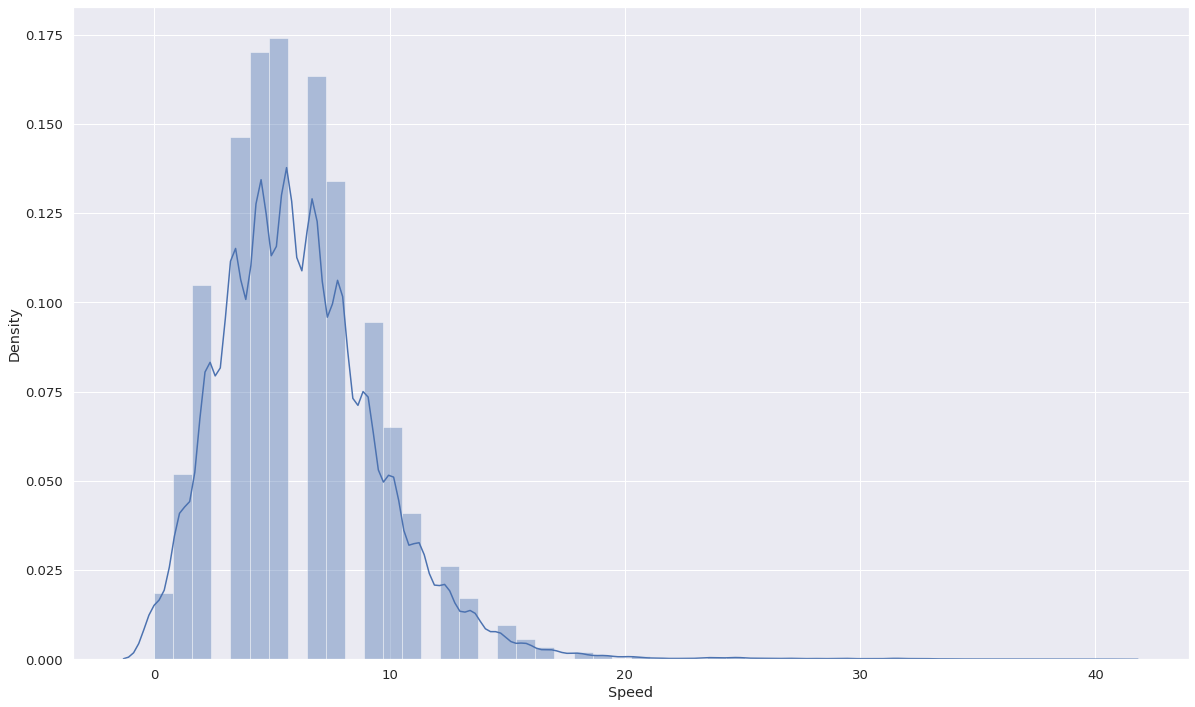

In [22]:
sns.distplot(df['Speed'])

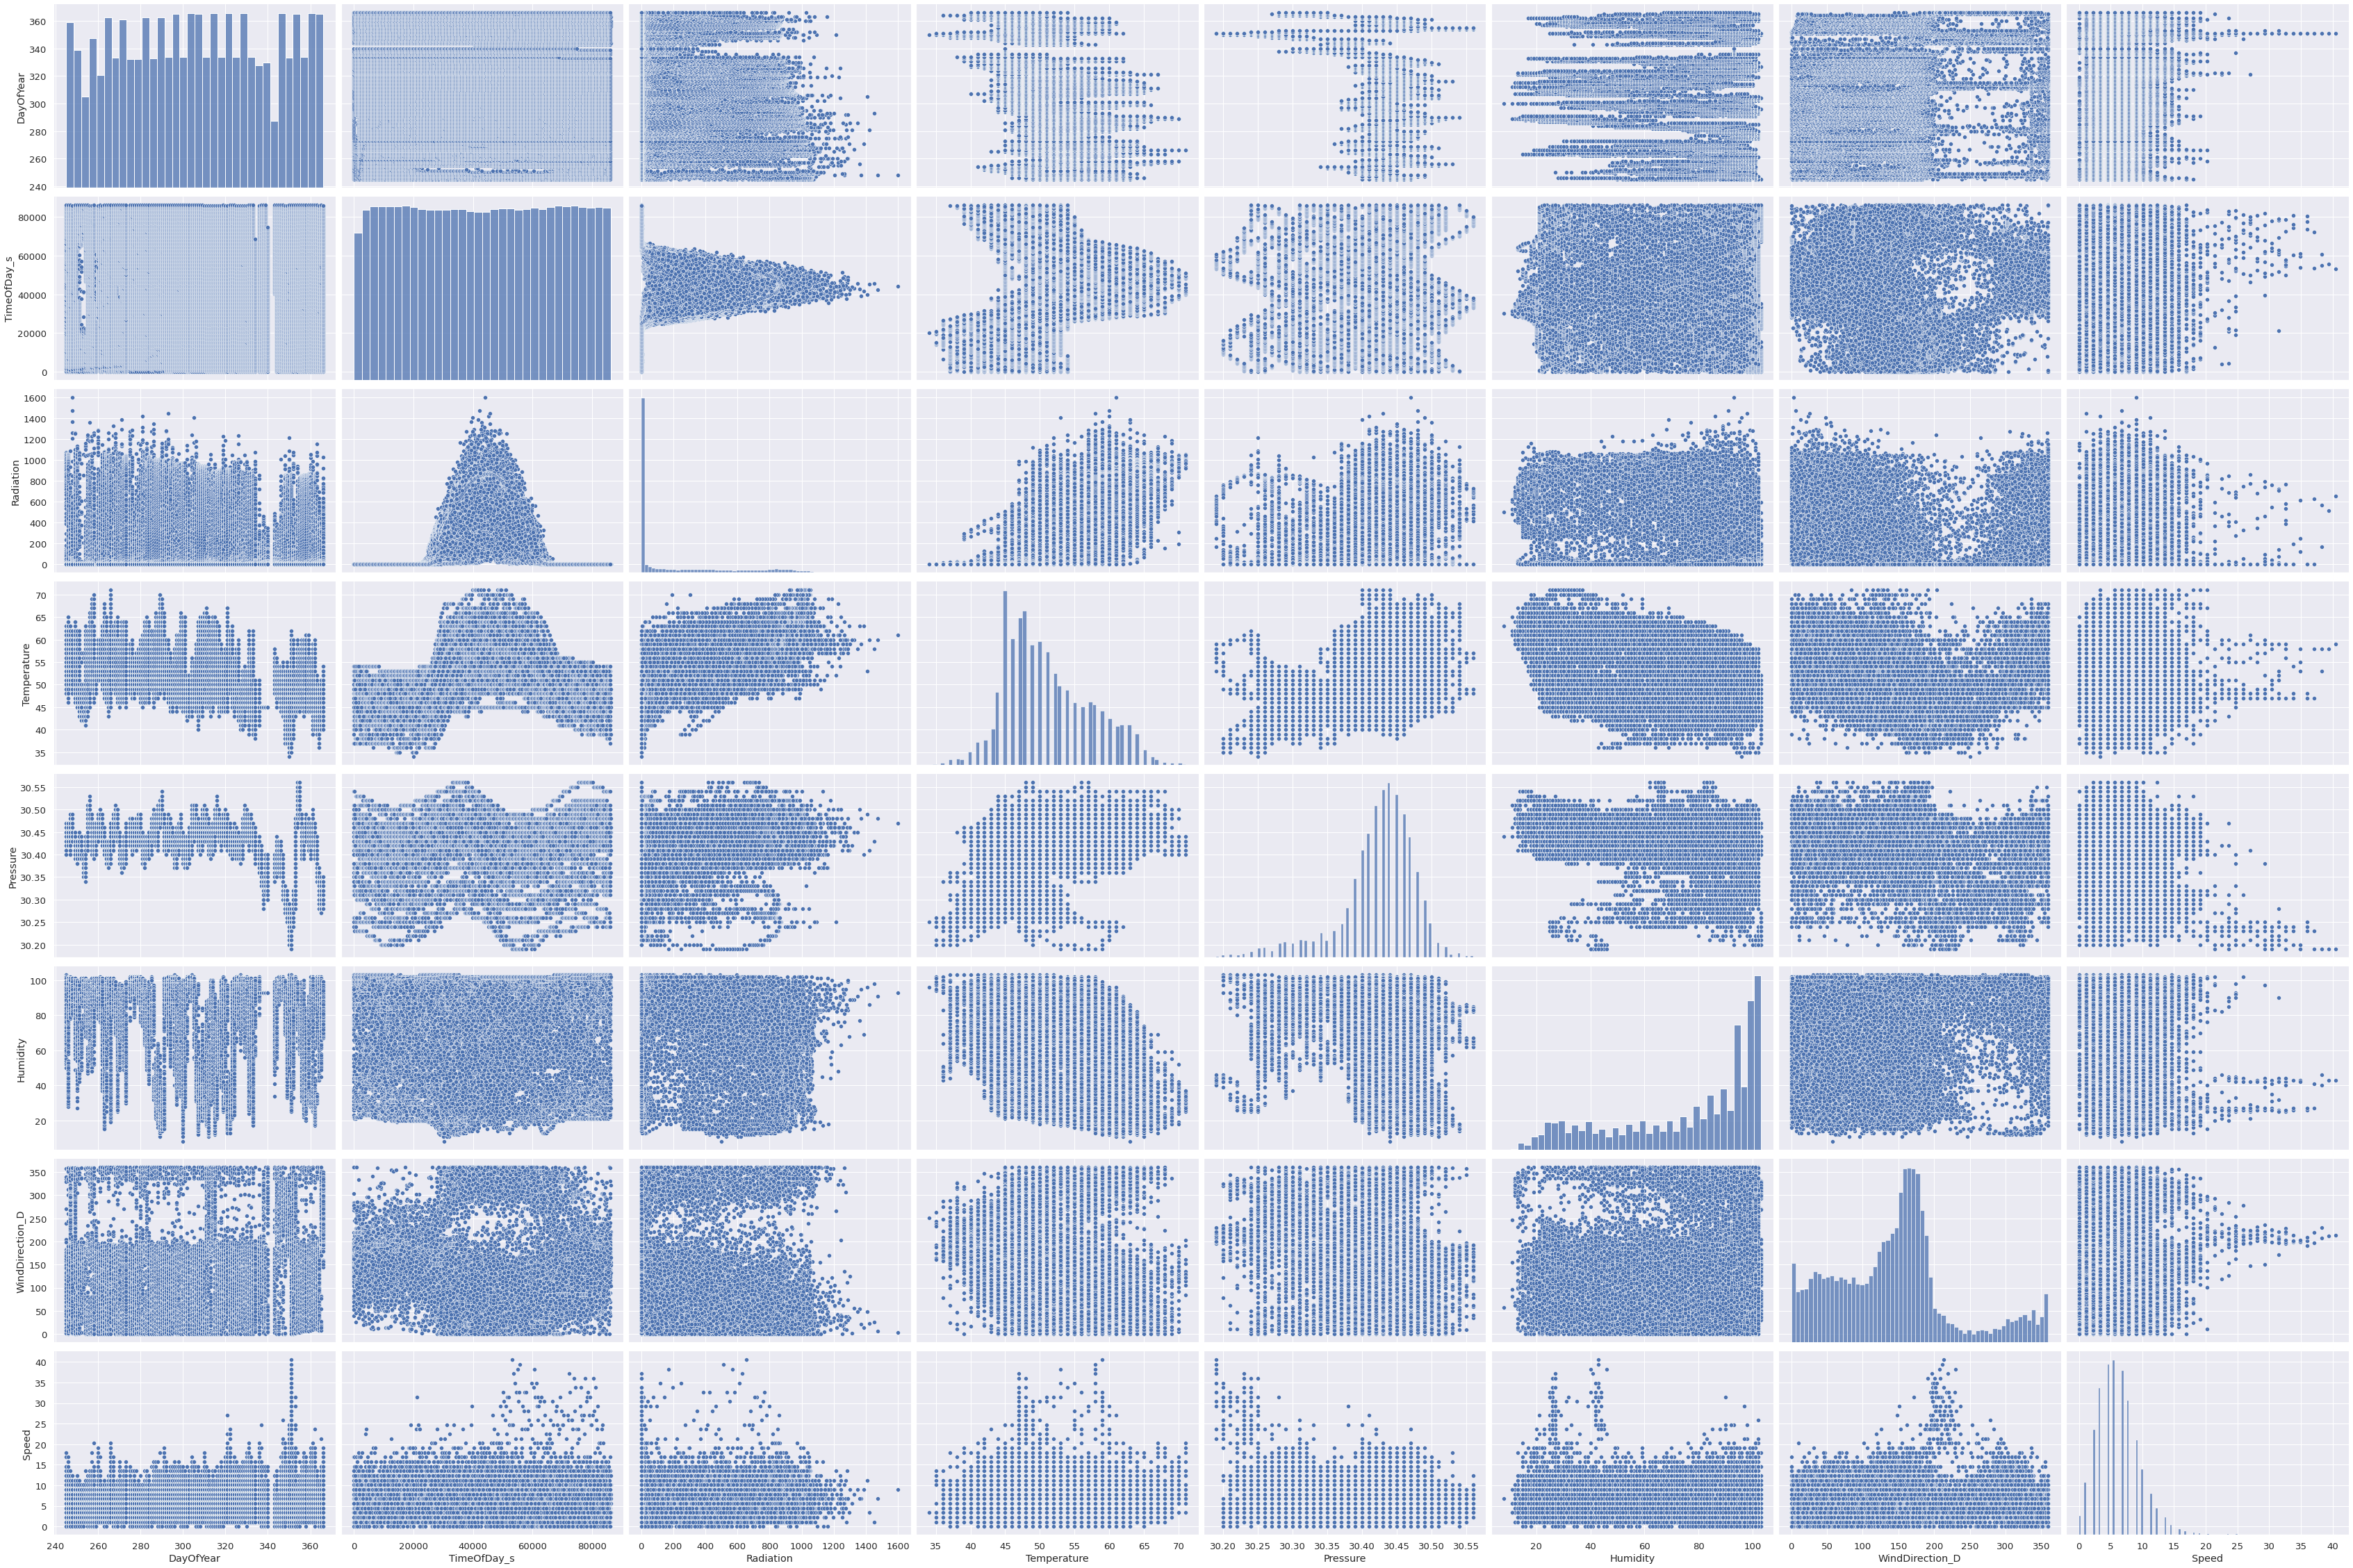

In [23]:
sns.pairplot(df, vars=[ 'DayOfYear','TimeOfDay_s', 'Radiation','Temperature', 'Pressure', 'Humidity',
                        'WindDirection_D','Speed'], height=4, aspect=1.5)

In [24]:
# Matrix form for correlation data
df.corr()

Year     Month       Day  ...   Hour(h)  Minute(m)  Second(s)
Year              NaN       NaN       NaN  ...       NaN        NaN        NaN
Month             NaN  1.000000  0.038027  ... -0.005396   0.000168   0.220563
Day               NaN  0.038027  1.000000  ... -0.008010  -0.000196   0.089078
DayOfYear         NaN  0.968255  0.286516  ... -0.007223   0.000095   0.230957
TimeOfDay_s       NaN -0.005270 -0.007966  ...  0.999134   0.037562   0.004821
DayLength_s       NaN -0.954596 -0.252531  ...  0.007993  -0.000093  -0.168378
Radiation         NaN -0.095450  0.039978  ...  0.004398  -0.000730  -0.031270
Temperature       NaN -0.354560 -0.123705  ...  0.197464  -0.001934  -0.036147
Pressure          NaN -0.341759 -0.024633  ...  0.091069   0.001860  -0.031102
Humidity          NaN -0.068854  0.014637  ...  0.077899   0.000499  -0.027682
WindDirection_D   NaN  0.181485 -0.082354  ... -0.077969  -0.000602  -0.032568
Speed             NaN  0.150822  0.117337  ... -0.057939   0.000192  -0.032934
Hour(h)           NaN -0.005396 -0.008010  ...  1.000000  -0.004052   0.004199
Minute(m)         NaN  0.000168 -0.000196  ... -0.004052   1.000000   0.002517
Second(s)         NaN  0.220563  0.089078  ...  0.004199   0.002517   1.000000

[15 rows x 15 columns]

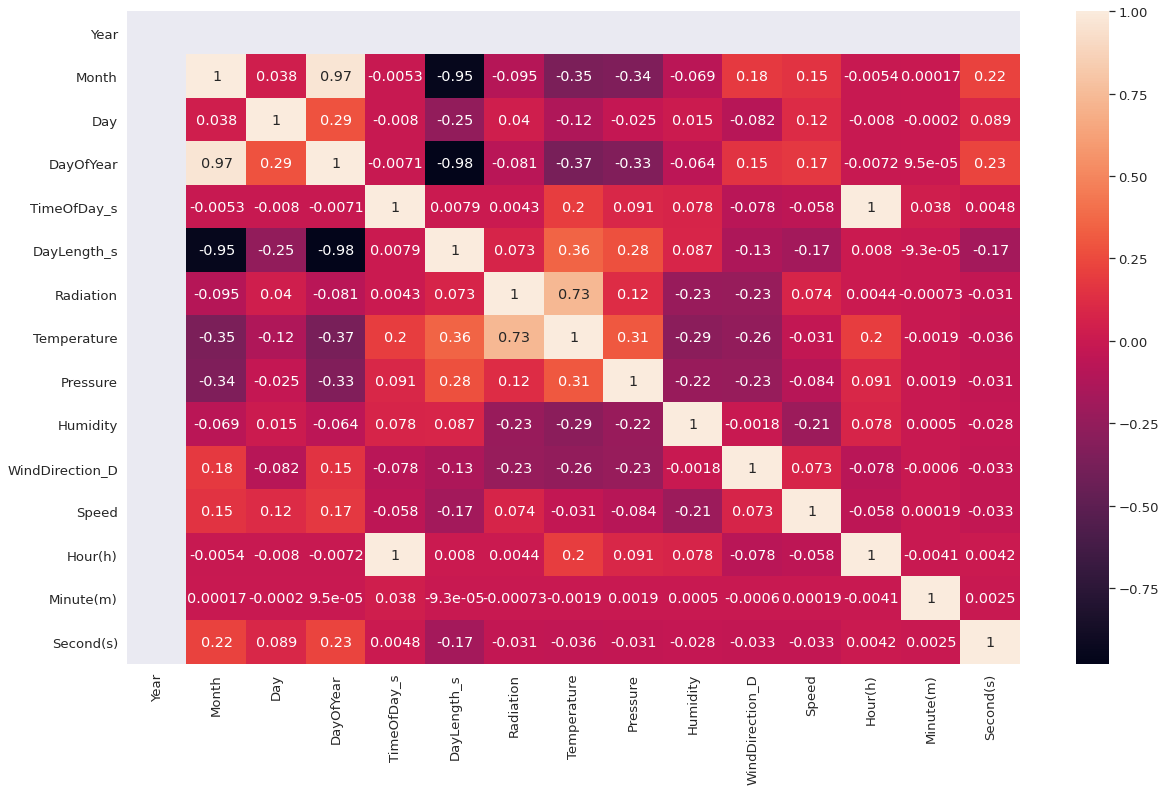

In [25]:
sns.heatmap(df.corr(), annot=True)

## From Heat Map, We Get That There are Relation Between:
- Humidity & Radiation. 
- Temeperature & Radiation.


--------

## `IMPORTANT_NOTE`

In [26]:
df1=df.copy() #For dealing with outliers

In [27]:
df2=df.copy() #For dealing without do anything to the outliers

-------------------
# The Solution `With Dealing with the Outliers`



##  Working with The Outliers
-----------------------------------------


In [28]:
df1.columns

Index(['Year', 'Month', 'Day', 'DayOfYear', 'TimeOfDay_s', 'DayLength_s',
       'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection_D',
       'Speed', 'Hour(h)', 'Minute(m)', 'Second(s)'],
      dtype='object')

In [29]:
check_columns=['Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection_D', 'Speed']

### Vasualize the Outliers

['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection_D', 'Speed']


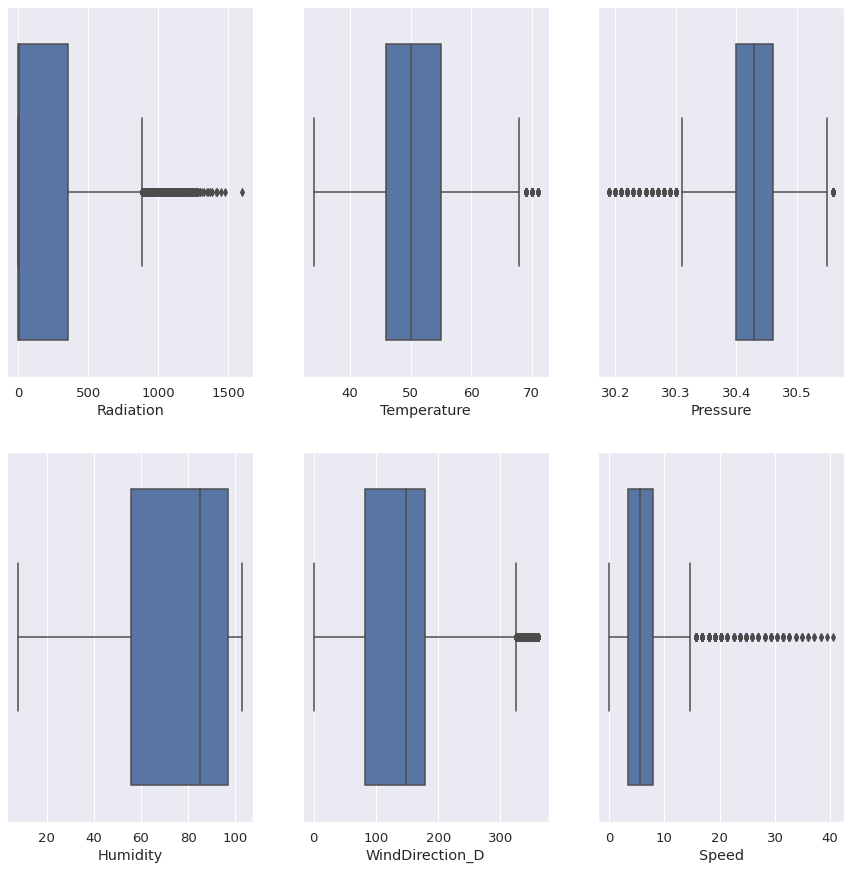

In [30]:
num_of_rows = 2
num_of_cols = 3
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(check_columns)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df1[check_columns[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

#### As You see there are a lot of outliers, that should be removed as below

### Remove the Outliers

#### First Step by datasist Library

In [31]:
for col in check_columns:
    outliers_indices = ds.structdata.detect_outliers(df1, 0, [col])
    col_median = df1[col].median()
    df1[col].iloc[outliers_indices] = col_median

#### Visualize Again

['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection_D', 'Speed']


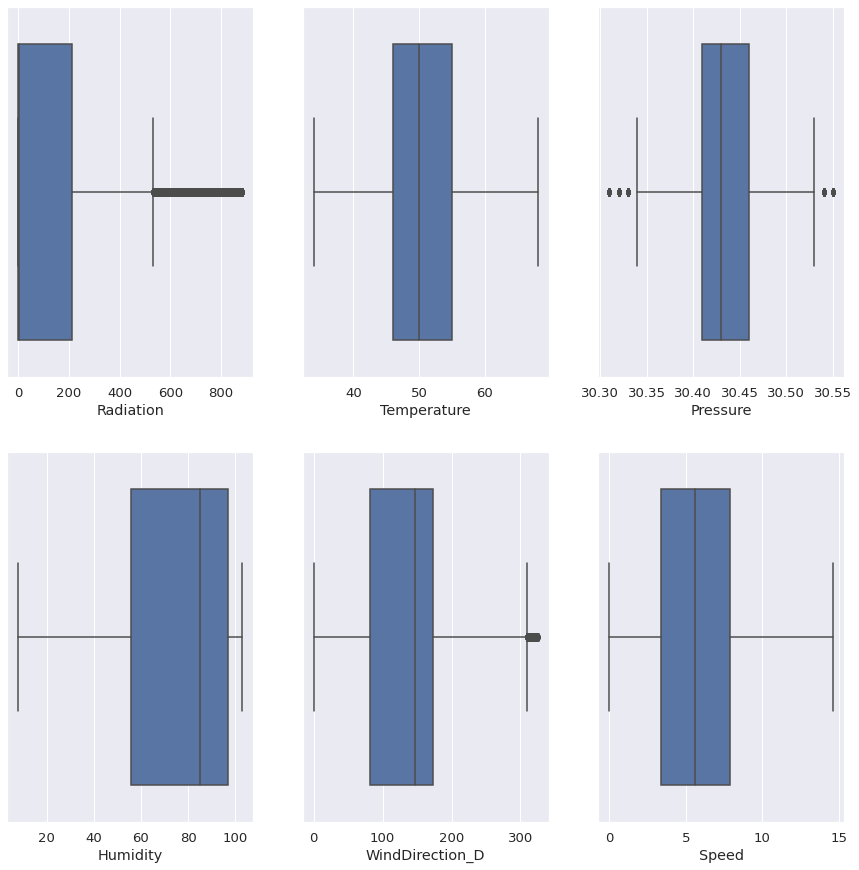

In [32]:
num_of_rows = 2
num_of_cols = 3
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(check_columns)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df1[check_columns[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

# 4- Data Preprocessing


## Train Model by DeepLearning
------------------------

In [33]:
from sklearn.model_selection import train_test_split


x = df2[['Temperature', 'Pressure', 'Humidity', 'WindDirection_D', 'Speed', 'DayOfYear','TimeOfDay_s']]
y = df2['Radiation']

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc =  StandardScaler()

sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [37]:
from tensorflow.keras.layers import Dropout

In [38]:
x_train.shape

(26148, 7)

In [39]:
y_train.shape

(26148,)

In [40]:
x_test.shape

(6538, 7)

In [41]:
x_train.shape[1]

7

# 5. Create the model and fit it..

In [42]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1))

In [43]:
model.compile(loss='mean_squared_error', optimizer=Adam(0.0002))

In [44]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 200,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=1000)

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 51,585
Trainable params: 51,585
Non-trainable params: 0
____________________________________________________

In [46]:
history = model.fit(x_train, y_train, validation_split=0.15, batch_size=128, epochs=6000, callbacks=[lrd, mcp, es])

Streaming output truncated to the last 5000 lines.
174/174 [==============================] - 1s 4ms/step - loss: 7045.1357 - val_loss: 7804.5996
Epoch 1233/6000
174/174 [==============================] - 1s 4ms/step - loss: 6865.8560 - val_loss: 7820.8218
Epoch 1234/6000
174/174 [==============================] - 1s 4ms/step - loss: 6937.4976 - val_loss: 7861.0093
Epoch 1235/6000
174/174 [==============================] - 1s 4ms/step - loss: 7176.2212 - val_loss: 7762.3691
Epoch 1236/6000
174/174 [==============================] - 1s 4ms/step - loss: 7017.3511 - val_loss: 7811.7925
Epoch 1237/6000
174/174 [==============================] - 1s 4ms/step - loss: 7051.2798 - val_loss: 7781.0771
Epoch 1238/6000
174/174 [==============================] - 1s 4ms/step - loss: 6972.9614 - val_loss: 7777.3667
Epoch 1239/6000
174/174 [==============================] - 1s 4ms/step - loss: 6914.1079 - val_loss: 7789.9180
Epoch 1240/6000
174/174 [==============================] - 1s 4ms/step - loss

In [47]:
model.evaluate(x_test, y_test)

205/205 [==============================] - 0s 2ms/step - loss: 8049.4844


8049.484375

In [48]:
y_pred = model.predict(x_test)
y_pred

array([[1021.42615  ],
       [ 344.77185  ],
       [   1.5668108],
       ...,
       [   1.3803637],
       [ 652.3515   ],
       [ 856.7454   ]], dtype=float32)

In [49]:
y_pred[1]

array([344.77185], dtype=float32)

In [50]:
y_test.iloc[1]

218.63

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2_score(y_test, y_pred)

0.9236115531973091

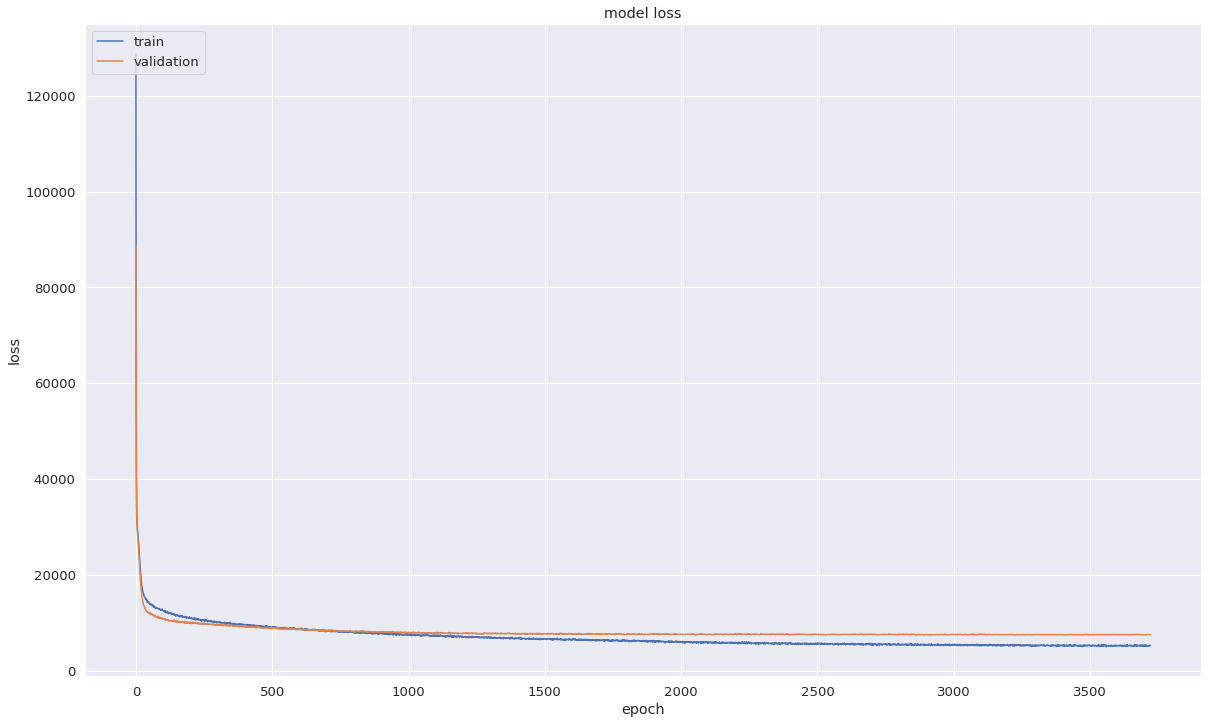

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **Reduce the Number of Epochs to 800**

In [54]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1))

In [55]:
model.compile(loss='mean_squared_error', optimizer=Adam(0.0002))

In [56]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 200,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=1000)

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 51,585
Trainable params: 51,585
Non-trainable params: 0
__________________________________________________

In [58]:
history = model.fit(x_train, y_train, validation_split=0.15, batch_size=128, epochs=800, callbacks=[lrd, mcp, es])

Epoch 1/800
174/174 [==============================] - 1s 4ms/step - loss: 128212.0234 - val_loss: 87396.8516
Epoch 2/800
174/174 [==============================] - 1s 3ms/step - loss: 59146.9375 - val_loss: 44340.7656
Epoch 3/800
174/174 [==============================] - 1s 3ms/step - loss: 39024.4805 - val_loss: 33767.0273
Epoch 4/800
174/174 [==============================] - 1s 3ms/step - loss: 32115.6875 - val_loss: 30165.6582
Epoch 5/800
174/174 [==============================] - 1s 3ms/step - loss: 29998.9746 - val_loss: 28850.7070
Epoch 6/800
174/174 [==============================] - 1s 3ms/step - loss: 29191.8320 - val_loss: 28039.4434
Epoch 7/800
174/174 [==============================] - 1s 3ms/step - loss: 28206.4258 - val_loss: 27094.8652
Epoch 8/800
174/174 [==============================] - 1s 3ms/step - loss: 27507.8965 - val_loss: 26282.8301
Epoch 9/800
174/174 [==============================] - 1s 3ms/step - loss: 26813.4375 - val_loss: 25371.9102
Epoch 10/800
174/1

In [59]:
model.evaluate(x_test, y_test)

205/205 [==============================] - 0s 2ms/step - loss: 8699.6406


8699.640625

In [60]:
y_pred = model.predict(x_test)
y_pred

array([[1080.3916   ],
       [ 339.16205  ],
       [   1.7268667],
       ...,
       [   2.314354 ],
       [ 651.9933   ],
       [ 892.8957   ]], dtype=float32)

In [61]:
y_pred[1]

array([339.16205], dtype=float32)

In [62]:
y_test.iloc[1]

218.63

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_test, y_pred)

0.9174416958387632

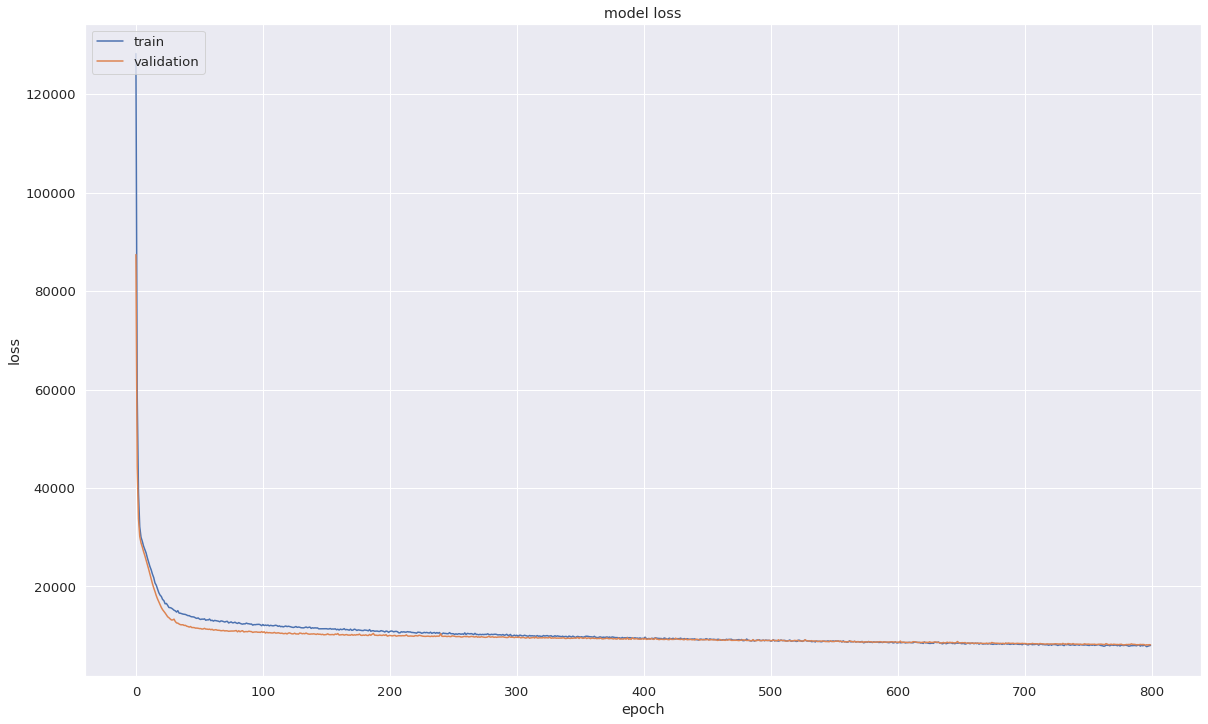

In [65]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Saving the model

In [66]:
model.save('model.h5')

In [67]:
import joblib

In [68]:
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

## Loading Model

In [69]:
sc = joblib.load('scaler.pkl')

In [78]:
df2[['Temperature', 'Pressure', 'Humidity', 'WindDirection_D', 'Speed', 'DayOfYear','TimeOfDay_s','Radiation']].describe()

Temperature      Pressure  ...   TimeOfDay_s     Radiation
count  32686.000000  32686.000000  ...  32686.000000  32686.000000
mean      51.103255     30.422879  ...  43277.574068    207.124697
std        6.201157      0.054673  ...  24900.749819    315.916387
min       34.000000     30.190000  ...      1.000000      1.110000
25%       46.000000     30.400000  ...  21617.000000      1.230000
50%       50.000000     30.430000  ...  43230.000000      2.660000
75%       55.000000     30.460000  ...  64849.000000    354.235000
max       71.000000     30.560000  ...  86185.000000   1601.260000

[8 rows x 8 columns]

## The Input Featuers are ['Temperature', 'Pressure', 'Humidity', 'WindDirection_D', 'Speed', 'DayOfYear','TimeOfDay_s']

In [71]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')
model.predict(sc.transform([[51,30.43,103,77.27,11.25,245,8]]))

array([[1.7663269]], dtype=float32)

In [75]:
round(model.predict(sc.transform([[42,31.43,15,200.5,35,50,1400]]))[0][0],2)

3.02

----------------

### Usefull Links:

##### - `DayOfYear` Calculator from  <a href="https://www.free-online-calculator-use.com/day-of-year-calculator.html#" target="_blank">`This Link`</a>.
    
